## SPARSE reconstruction 
###### Author: Zimu Huo
###### Date: 03.2022


"Compressed Sensing in MRI" speech from Michael Lustig from the 2013 ISMRM Annual Meeting

The generation of the pdf and mask is **translated** from Michael Lustig's
tutorial for his course, which can be found from his website
(Metropolis–Hastings algorithm)

Special thanks to Neal for sending me the resources 

You might need to install the pywt package for wavelet transforms and if 
you are running on conda environment you should try: 

```bash
conda install pywavelets
```
-------------------------------------------------------------------------
References
    
    [1] 
    Author: Michael Lustig et al. 
    Title: Sparse MRI: The Application of Compressed Sensing for Rapid MR Imaging
    Link: https://pubmed.ncbi.nlm.nih.gov/17969013/

In [1]:
import sys
sys.path.insert(1, '../')
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
import numpy.matlib
import pywt
from util.mask import *
import util.phantom as phantom
from util.fft import * 
from util.SPARSE import *

(512, 512)
we are throwing away 30.10 percent of the data!


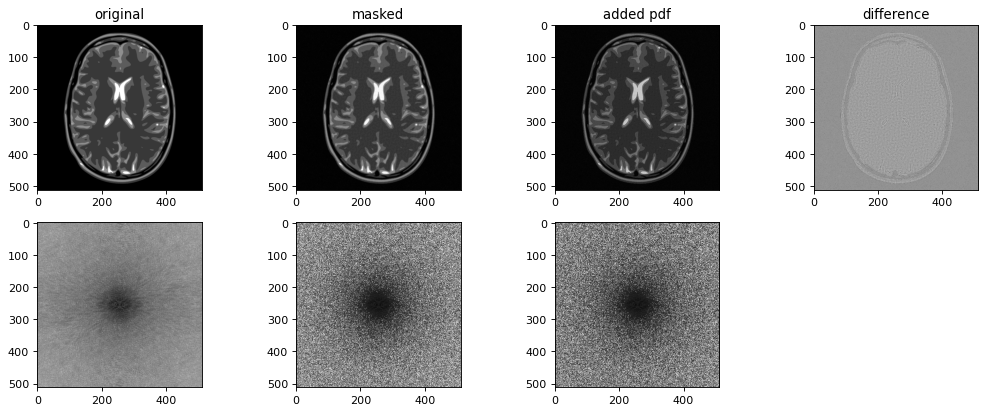

In [2]:
image = phantom.brain(512, 1)
truth = phantom.brain(512, 1)
print(image.shape)
# all the user parameters for generating the mask and pdf 
val = 0.5
pctg = 0.4
radius = 0.01
p = 3
imSize = np.asarray(image.shape)
tol = 80000
numIter = 5

densityMaps = genPDF(imSize, p, pctg, radius)
mask = genMask(densityMaps, tol, numIter)
image_fft = fft2c(image)
image_mask = image_fft*mask
image_un = image_mask/densityMaps
image_cs = ifft2c(image_un)
e = 0.000000001
percent = (np.count_nonzero(mask==0))/(512**2)
print("we are throwing away " + str(percent*100)[0:5] + " percent of the data!")
# original image, mask, and density maps
plt.figure(figsize=(16, 6), dpi=80)
plt.tight_layout(pad=1.0)
plt.subplot(241)
plt.imshow(np.abs(image), cmap='gray')
plt.title("original")
plt.subplot(242)
plt.imshow(np.abs(ifft2c(image_mask)), cmap='gray')
plt.title("masked")
plt.subplot(243)
plt.imshow(np.abs(ifft2c(image_un)), cmap='gray')
plt.title("added pdf")
plt.subplot(244)
plt.imshow(np.abs(image)-np.abs(image_cs), cmap='gray')
plt.title("difference")
plt.subplot(245)
plt.imshow(np.abs(np.log(image_fft+e)), cmap='gray')
plt.subplot(246)
plt.imshow(np.abs(np.log(image_mask+e)), cmap='gray')
plt.subplot(247)
plt.imshow(np.abs(np.log(image_un+e)), cmap='gray')
plt.show()

Deviation from the original before reconstruction:  11784879.332149401
Deviation from the original after reconstruction:  11667923.664919425


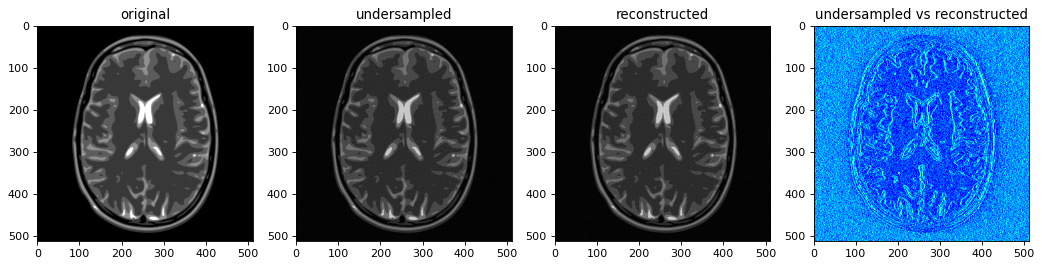

In [3]:
rec = wavelet_denoising(image_cs)
plt.figure(figsize=(16, 12), dpi=80)
plt.subplot(141)
plt.imshow(np.abs(image), cmap='gray')
plt.title("original")
plt.subplot(142)
plt.imshow(np.abs(image_cs), cmap='gray')
plt.title("undersampled")
plt.subplot(143)
plt.imshow(np.abs(rec), cmap='gray')
plt.title("reconstructed")
plt.subplot(144)
plt.imshow(np.abs(np.abs(image_cs) - np.abs(rec)), cmap='jet')
plt.title("undersampled vs reconstructed")
print("Deviation from the original before reconstruction: ",np.sum((np.abs(image_cs) - np.abs(truth))**2))
print("Deviation from the original after reconstruction: ",np.sum((np.abs(rec) - np.abs(truth))**2))

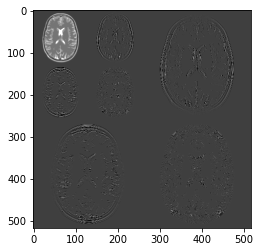

In [4]:
n = 2
w = 'db2'
coeffs = pywt.wavedec2(np.abs(image),wavelet=w,level=n)

# normalize each coefficient array
coeffs[0] /= np.abs(coeffs[0]).max()
for detail_level in range(n):
    coeffs[detail_level + 1] = [d/np.abs(d).max() for d in coeffs[detail_level + 1]]

arr, coeff_slices = pywt.coeffs_to_array(coeffs)



plt.imshow(arr,cmap='gray',vmin=-0.25,vmax=0.75)
plt.show()